# Phase 1 Project:  Aircraft Risk And Safety Analysis

<img src="aviation-safety.jpg" style="width:900px; height:450px"/>

## Introduction
The company is expanding into aviation to operate airplanes for commercial and private use. To support this, the project analyzes aviation accident data from 1962 to 2023, sourced from the National Transportation Safety Board, covering civil aviation incidents in the U.S. and international waters. The aim is to assess safety risks and operational factors to provide actionable insights, helping the aviation division select aircraft models that align with safety and business goals.

## Business Problem
The company is venturing into the aviation industry to operate airplanes for both commercial and private enterprises but lacks expertise in assessing aircraft risks. To ensure a safe and successful entry into this industry, the company faces the following challenges:

1. Safety Risk Assessment
- Evaluate historical accident and incident data to analyze the frequency and severity of aviation events, helping identify low-risk aircraft models.

2. Geographical and Temporal Analysis
- Understand the spatial and temporal distribution of aviation events to pinpoint high-risk regions and timeframes for safer operations.

3. Event Type and Investigation Insights
- Examine the distribution of accidents versus incidents and the associated investigation levels to uncover operational risks and areas requiring additional focus.

The objective is to deliver a data-driven analysis to inform aircraft selection and operational strategies, ensuring safety and reducing risks in the company's new aviation venture.

## 1. Data understanding
The dataset, sourced from the National Transportation Safety Board, provides detailed records of aviation accidents and incidents from 1962 to 2023. It covers events in the United States and international waters, offering a reliable basis for analyzing safety risks and operational factors in the aviation industry.

### Explore data

In [1]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

### 1. Loading the dataset and getting information

In [2]:
# Read the dataset using with open
with open("AviationData.csv") as f:
    df =pd.read_csv(f)

In [3]:
#Checking top 5 columns
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## 2. Data Preparation

In [4]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#checking the dataset shape
df.shape

(88889, 31)

In [6]:
#checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#concise summary statistics
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [8]:
#Describe categorical features

df.describe(include='object')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [9]:
# check for unique values in each column

for column in df:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}','\n': {unique_values}",'\n')

Unique values in column 'Event.Id','
': ['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513'] 

Unique values in column 'Investigation.Type','
': ['Accident' 'Incident'] 

Unique values in column 'Accident.Number','
': ['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097'] 

Unique values in column 'Event.Date','
': ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29'] 

Unique values in column 'Location','
': ['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, '] 

Unique values in column 'Country','
': ['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' '

###  Data Cleaning

#### Checking the columns and dealing with mispelled columns

In [10]:
# check the colunms
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [11]:
# Change columns name to lower case for uniformity
# Removing the white space if any
df.columns = df.columns.str.lower().str.replace(' ', '')

In [12]:
# Remove in the entire datafram 
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   event.id                88889 non-null  object 
 1   investigation.type      88889 non-null  object 
 2   accident.number         88889 non-null  object 
 3   event.date              88889 non-null  object 
 4   location                88837 non-null  object 
 5   country                 88663 non-null  object 
 6   latitude                34382 non-null  object 
 7   longitude               34373 non-null  object 
 8   airport.code            50132 non-null  object 
 9   airport.name            52704 non-null  object 
 10  injury.severity         87889 non-null  object 
 11  aircraft.damage         85695 non-null  object 
 12  aircraft.category       32287 non-null  object 
 13  registration.number     87507 non-null  object 
 14  make                    88826 non-null

In [13]:
df.make = df.make.str.lower()

In [14]:
# Checking the clumns
df.columns

Index(['event.id', 'investigation.type', 'accident.number', 'event.date',
       'location', 'country', 'latitude', 'longitude', 'airport.code',
       'airport.name', 'injury.severity', 'aircraft.damage',
       'aircraft.category', 'registration.number', 'make', 'model',
       'amateur.built', 'number.of.engines', 'engine.type', 'far.description',
       'schedule', 'purpose.of.flight', 'air.carrier', 'total.fatal.injuries',
       'total.serious.injuries', 'total.minor.injuries', 'total.uninjured',
       'weather.condition', 'broad.phase.of.flight', 'report.status',
       'publication.date'],
      dtype='object')

In [15]:
#checking the datatypes of the columns 
df.dtypes

event.id                   object
investigation.type         object
accident.number            object
event.date                 object
location                   object
country                    object
latitude                   object
longitude                  object
airport.code               object
airport.name               object
injury.severity            object
aircraft.damage            object
aircraft.category          object
registration.number        object
make                       object
model                      object
amateur.built              object
number.of.engines         float64
engine.type                object
far.description            object
schedule                   object
purpose.of.flight          object
air.carrier                object
total.fatal.injuries      float64
total.serious.injuries    float64
total.minor.injuries      float64
total.uninjured           float64
weather.condition          object
broad.phase.of.flight      object
report.status 

In [16]:
df.isnull().values.any()

True

In [17]:
# List of columns to drop
unwanted_columns = [
    'air.carrier', 'registration.number', 
    'publication.date', 'model', 
    'amateur.built', 'report.status', 'accident.number'
]

# Drop unwanted columns
df = df.drop(columns=unwanted_columns)

In [18]:
df.columns

Index(['event.id', 'investigation.type', 'event.date', 'location', 'country',
       'latitude', 'longitude', 'airport.code', 'airport.name',
       'injury.severity', 'aircraft.damage', 'aircraft.category', 'make',
       'number.of.engines', 'engine.type', 'far.description', 'schedule',
       'purpose.of.flight', 'total.fatal.injuries', 'total.serious.injuries',
       'total.minor.injuries', 'total.uninjured', 'weather.condition',
       'broad.phase.of.flight'],
      dtype='object')

### Dropping and filling missing values both categorical and numerical columns

In [19]:
df['weather.condition'].unique()

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [20]:
# Finding the most repeated value in weather.condition
mode = df['weather.condition'].value_counts().idxmax()

In [21]:
# Replacing UNK, Unk, and nan values with mode(using the logical conditions)
df['weather.condition'] = df['weather.condition'].replace(['UNK', 'Unk', np.nan], mode)

In [22]:
df['weather.condition'].unique()

array(['VMC', 'IMC'], dtype=object)

In [23]:
df.isnull().sum()

event.id                      0
investigation.type            0
event.date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport.code              38757
airport.name              36185
injury.severity            1000
aircraft.damage            3194
aircraft.category         56602
make                         63
number.of.engines          6084
engine.type                7096
far.description           56866
schedule                  76307
purpose.of.flight          6192
total.fatal.injuries      11401
total.serious.injuries    12510
total.minor.injuries      11933
total.uninjured            5912
weather.condition             0
broad.phase.of.flight     27165
dtype: int64

### Impute missing values.

In [24]:
# Fill missing airport code using the mode within the same location
df['airport.code'] = df['airport.code'].fillna(
    df.groupby('location')['airport.code'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

# Fill missing airport name using the mode within the same airport code
df['airport.name'] = df['airport.name'].fillna(
    df.groupby('airport.code')['airport.name'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

In [25]:
# Fill missing latitude and longitude using the mode within the same airport.code
df['latitude'] = df['latitude'].fillna(
    df.groupby('airport.code')['latitude'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

df['longitude'] = df['longitude'].fillna(
    df.groupby('airport.code')['longitude'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

In [26]:
# For `far.description`
df['far.description'] = df['far.description'].fillna(
    df.groupby('aircraft.category')['far.description'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
).fillna('Unknown')

# For `schedule`
df['schedule'] = df['schedule'].fillna(
    df.groupby('purpose.of.flight')['schedule'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
).fillna('Unknown')

In [27]:
df['far.description'] = df['far.description'].fillna(method='ffill').fillna(method='bfill')
df['schedule'] = df['schedule'].fillna(method='ffill').fillna(method='bfill')

In [28]:
# Impute using mode (for categorical data)
for col in ['aircraft.damage', 'aircraft.category', 'make']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

In [29]:
# List of categorical columns
categorical_columns = ['location', 'country', 'purpose.of.flight',
                       'broad.phase.of.flight', 'injury.severity', 'engine.type']

# Impute missing values with the mode (most frequent value)
for col in categorical_columns:
    mode_value = df[col].mode()[0]  # Get the most frequent value (mode)
    df[col].fillna(mode_value, inplace=True)
    df[col] = df[col].replace('UNK', mode_value)  # Replace 'UNK' with mode if it exists
    df[col] = df[col].replace('Unk', mode_value)  # Replace 'Unk' with mode if it exists

In [30]:
# List of numerical columns
numerical_columns = ['total.fatal.injuries', 'total.serious.injuries',
                     'total.minor.injuries', 'total.uninjured', 'number.of.engines']

# Impute missing values with the mean or median
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)  # Replace NaN with mean (or df[col].median() for median)

In [31]:
# Remove rows where airport.name contains 'Unknown' or 'None'
df = df[~df['airport.name'].str.contains('Unknown|None', case=False, na=False)]

In [32]:
df.isnull().sum()

event.id                   0
investigation.type         0
event.date                 0
location                   0
country                    0
latitude                  45
longitude                 45
airport.code              50
airport.name              50
injury.severity            0
aircraft.damage            0
aircraft.category          0
make                       0
number.of.engines          0
engine.type                0
far.description            0
schedule                   0
purpose.of.flight          0
total.fatal.injuries       0
total.serious.injuries     0
total.minor.injuries       0
total.uninjured            0
weather.condition          0
broad.phase.of.flight      0
dtype: int64

### Using Forward Fill and Backward Fill to remove the remaining missing values from imputation
If geographical order matters, forward/backward filling to propagate values from neighboring rows:

In [33]:
# Forward fill, then backward fill
df['latitude'] = df['latitude'].fillna(method='ffill').fillna(method='bfill')
df['longitude'] = df['longitude'].fillna(method='ffill').fillna(method='bfill')
df['airport.code'] = df['airport.code'].fillna(method='ffill').fillna(method='bfill')
df['airport.name'] = df['airport.name'].fillna(method='ffill').fillna(method='bfill')

In [34]:
df.isnull().sum()

event.id                  0
investigation.type        0
event.date                0
location                  0
country                   0
latitude                  0
longitude                 0
airport.code              0
airport.name              0
injury.severity           0
aircraft.damage           0
aircraft.category         0
make                      0
number.of.engines         0
engine.type               0
far.description           0
schedule                  0
purpose.of.flight         0
total.fatal.injuries      0
total.serious.injuries    0
total.minor.injuries      0
total.uninjured           0
weather.condition         0
broad.phase.of.flight     0
dtype: int64

### Derived Columns

In [35]:
# Extract the year from the event.date column for temporal analysis.
df['event.year'] = pd.to_datetime(df['event.date']).dt.year
df['event.year'].head()

0    1948
1    1962
2    1974
3    1977
4    1979
Name: event.year, dtype: int32

In [36]:
# Extract the month to analyze seasonal trends in accidents/incidents.
df['event.month'] = pd.to_datetime(df['event.date']).dt.month
df['event.month'].head()

0    10
1     7
2     8
3     6
4     8
Name: event.month, dtype: int32

In [37]:
# Create a categorical column summarizing injury severity based on total.fatal.injuries, 
# total.serious.injuries, and total.minor.injuries.
df['injury.severity.level'] = df.apply(lambda row: 'Fatal' if row['total.fatal.injuries'] > 0 else (
    'Serious' if row['total.serious.injuries'] > 0 else (
        'Minor' if row['total.minor.injuries'] > 0 else 'None'
    )
), axis=1)
df['injury.severity.level'].head(20)

0     Fatal
1     Fatal
2     Fatal
3     Fatal
4     Fatal
5     Fatal
6     Fatal
7      None
8      None
9     Minor
10     None
11     None
12    Minor
13    Fatal
14    Fatal
15    Fatal
16     None
17    Fatal
18     None
19     None
Name: injury.severity.level, dtype: object

In [38]:
# Sum all injury columns (total.fatal.injuries, total.serious.injuries, total.minor.injuries).
df['total.injuries'] = df[['total.fatal.injuries', 'total.serious.injuries', 'total.minor.injuries']].sum(axis=1)
df['total.injuries'].head()

0    2.000000
1    4.000000
2    3.636942
3    2.000000
4    3.357061
Name: total.injuries, dtype: float64

In [39]:
# Create a column to categorize accidents/incidents by the broad.phase.of.flight to see
# which phases (e.g., takeoff, landing) are most risky.
df['phase.of.flight.risk'] = df['broad.phase.of.flight'].fillna('Unknown')
df['phase.of.flight.risk'].head(20)

0       Cruise
1      Unknown
2       Cruise
3       Cruise
4     Approach
5        Climb
6      Unknown
7      Takeoff
8      Landing
9       Cruise
10    Approach
11     Landing
12      Cruise
13     Takeoff
14      Cruise
15      Cruise
16        Taxi
17     Unknown
18        Taxi
19      Cruise
Name: phase.of.flight.risk, dtype: object

In [40]:
df['far.description'].value_counts()

far.description
Unknown                           56031
091                               18774
Part 91: General Aviation          6474
NUSN                               1519
137                                1006
NUSC                               1000
135                                 745
121                                 676
Part 137: Agricultural              437
UNK                                 354
Part 135: Air Taxi & Commuter       298
PUBU                                252
129                                 242
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Public Use                           18
091K                                 13
ARMF                                  8
125                                   5
Part 125: 20+ Pax,6000+ lbs           5
107                     

In [41]:
df['make'].head(50)

0               stinson
1                 piper
2                cessna
3              rockwell
4                cessna
5     mcdonnell douglas
6                cessna
7                cessna
8                cessna
9        north american
10                piper
11                beech
12             bellanca
13               cessna
14               navion
15                beech
16              enstrom
17               cessna
18               cessna
19                smith
20               cessna
21               cessna
22                 bell
23                piper
24              grumman
25               cessna
26           beechcraft
27                maule
28               cessna
29             bellanca
30               cessna
31          air tractor
32                piper
33                piper
34               cessna
35                piper
36               cessna
37               navion
38                piper
39                piper
40             rockwell
41              

Risk Category

In [42]:
def categorize_risk(row):
    if row['total.fatal.injuries'] > 0 or row['aircraft.damage'] == 'Destroyed':
        return 'High Risk'
    elif row['total.serious.injuries'] > 0 or row['aircraft.damage'] == 'Substantial':
        return 'Moderate Risk'
    elif row['total.minor.injuries'] > 0 or row['aircraft.damage'] == 'Minor':
        return 'Low Risk'
    else:
        return 'Minimal Risk'

df['risk.category'] = df.apply(categorize_risk, axis=1)
# df[['total.fatal.injuries', 'total.serious.injuries', 
#'total.minor.injuries', 'aircraft.damage', 'risk.category']].head()

Categorize the risk level of each event based on a combination of severity (e.g., injury, damage), event type, and operational factors like weather and phase of flight. This column will help prioritize aircraft models and operational conditions that are safer.

This new risk_category column directly supports the business goal of identifying low-risk aircraft and operational scenarios, aiding informed decision-making.

In [43]:
df['risk.category'].value_counts()

risk.category
Moderate Risk    51962
High Risk        34402
Low Risk          2027
Minimal Risk        72
Name: count, dtype: int64

### Define Risk Criteria:

1. High Risk: Fatal injuries or significant aircraft damage.
2. Moderate Risk: Serious injuries or moderate aircraft damage.
3. Low Risk: Minor injuries, no fatalities, and minor or no aircraft damage.
4. Minimal Risk: No injuries and no aircraft damage.

## Outlire removal methods
    IQR - non-normal distribution
    Z-method - normal distibution

In [44]:
numeric_df = df.select_dtypes(include=[np.number])

In [45]:
numeric_df = numeric_df.dropna()
numeric_df

,number.of.engines,total.fatal.injuries,total.serious.injuries,total.minor.injuries,total.uninjured,event.year,event.month,total.injuries
0,1.000000,2.0,0.000000,0.000000,0.00000,1948,10,2.000000
1,1.000000,4.0,0.000000,0.000000,0.00000,1962,7,4.000000
2,1.000000,3.0,0.279881,0.357061,5.32544,1974,8,3.636942
3,1.000000,2.0,0.000000,0.000000,0.00000,1977,6,2.000000
4,1.146585,1.0,2.000000,0.357061,0.00000,1979,8,3.357061
...,...,...,...,...,...,...,...,...
88884,1.146585,0.0,1.000000,0.000000,0.00000,2022,12,1.000000
88885,1.146585,0.0,0.000000,0.000000,0.00000,2022,12,0.000000
88886,1.000000,0.0,0.000000,0.000000,1.00000,2022,12,0.000000
88887,1.146585,0.0,0.000000,0.000000,0.00000,2022,12,0.000000


In [46]:
correlation_matrix = numeric_df.corr()

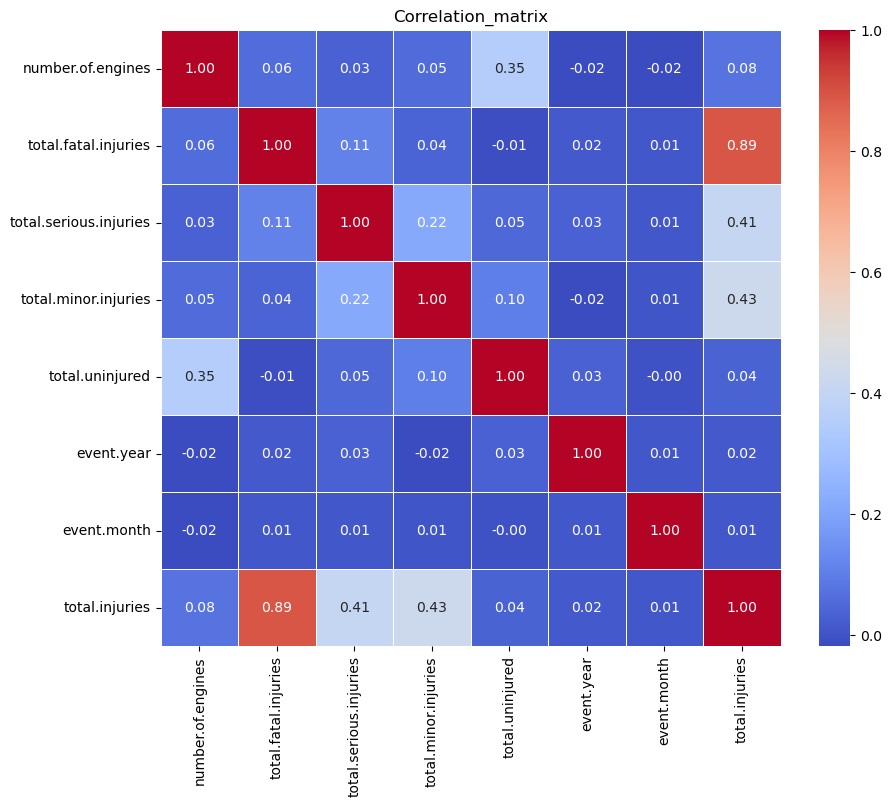

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation_matrix")
plt.show()

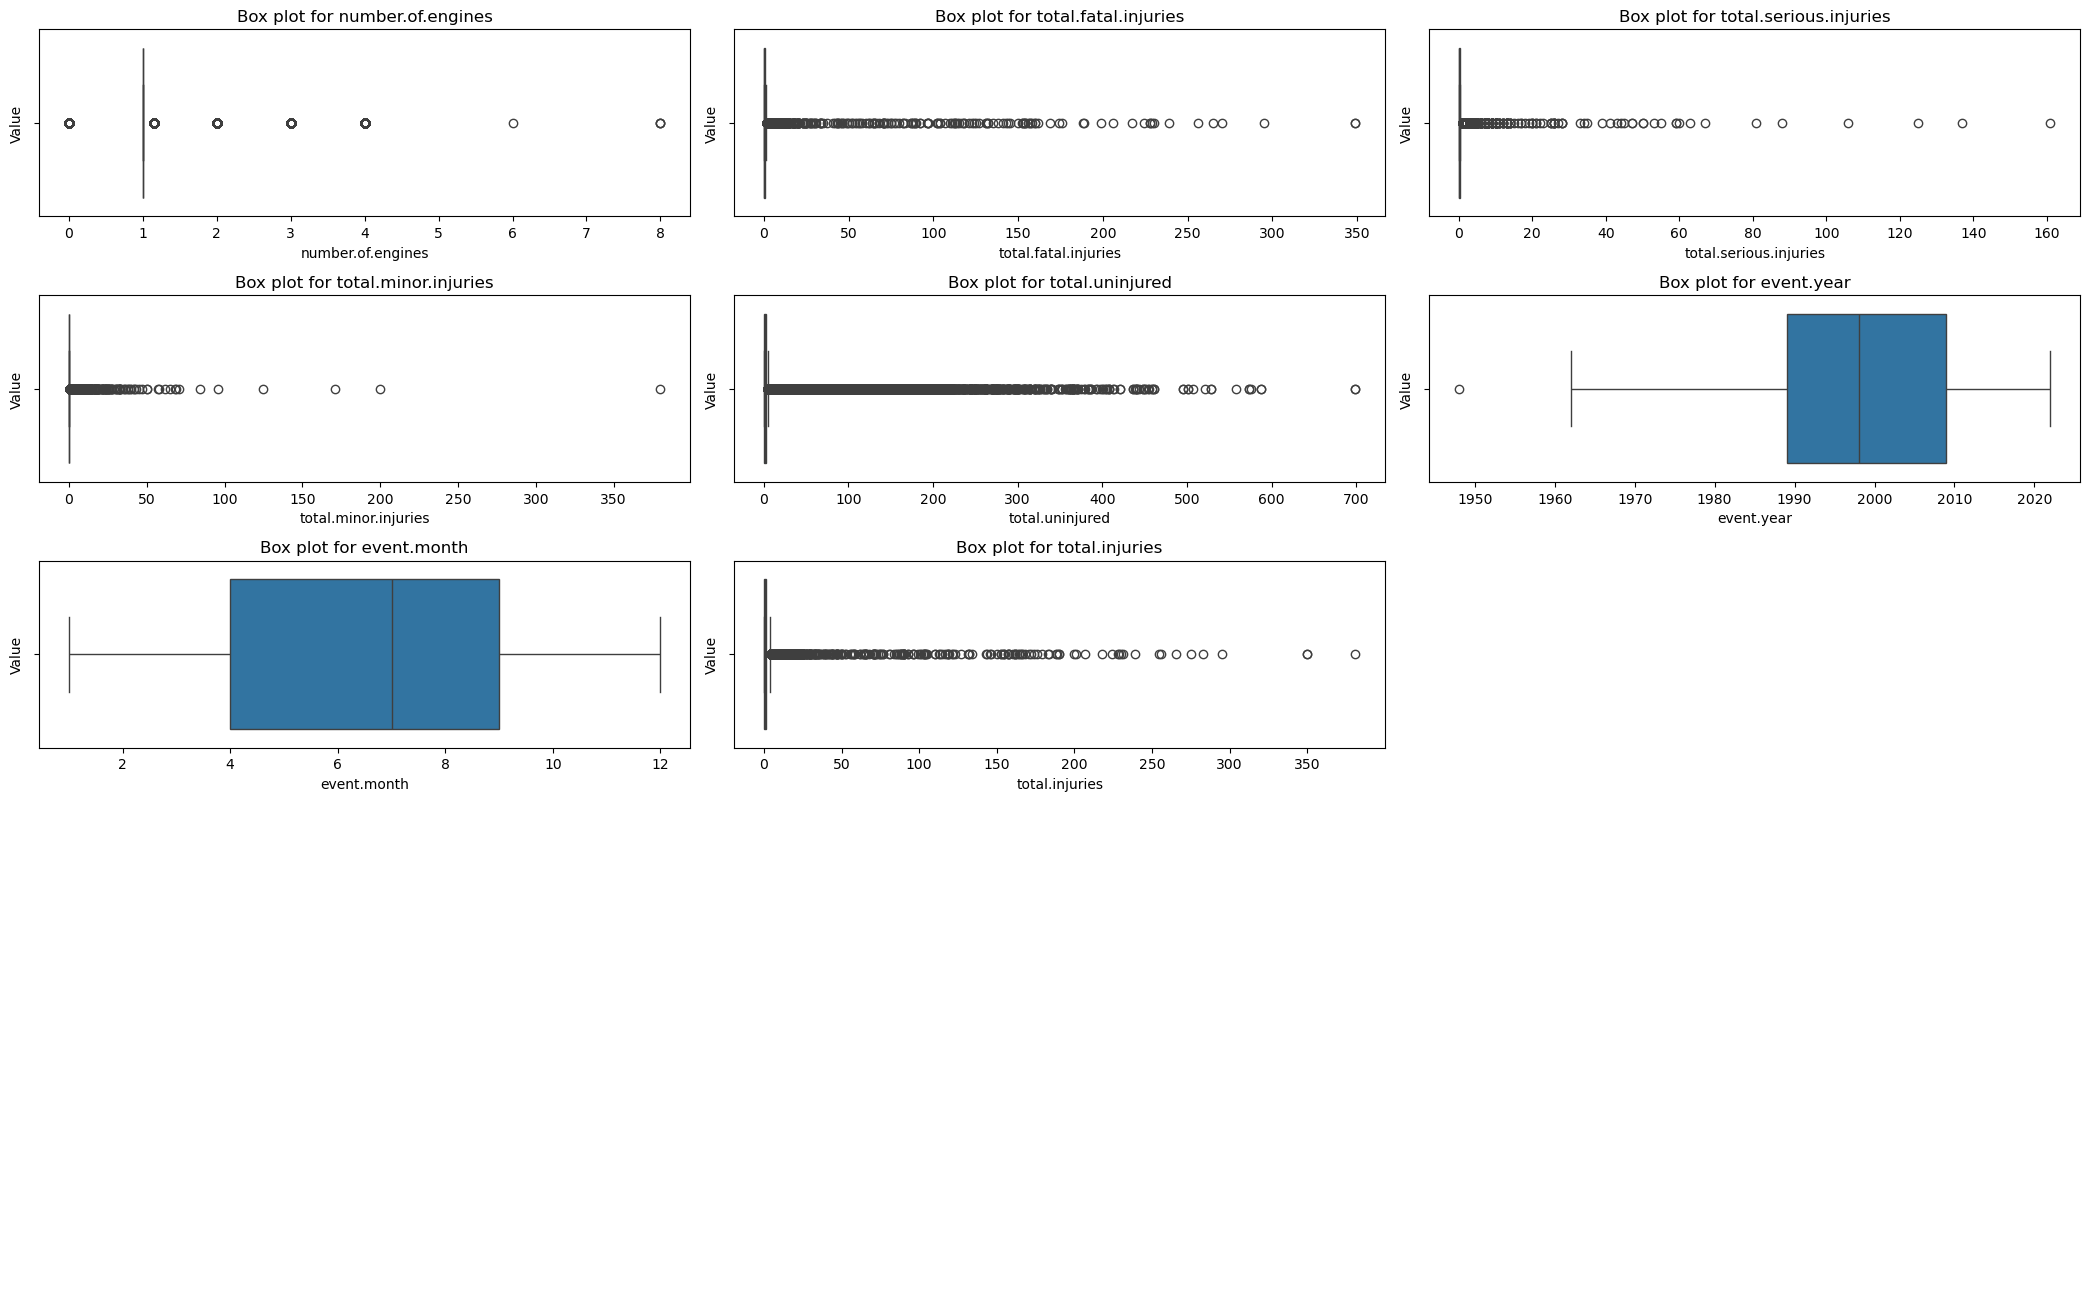

In [48]:
# Grid layout
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_df):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [49]:

# Select only numeric columns
numeric_data = df.select_dtypes(include=['number'])

# Calculate q1, q3, and IQR for numeric data only
q1 = numeric_data.quantile(0.25)  # .25
q3 = numeric_data.quantile(0.75)  # .75
IQR = q3 - q1

# Lower and upper bounds for identifying outliers
lower_bound = q1 - (1.5 * IQR)
upper_bound = q3 + (1.5 * IQR)

# Identify outliers in numeric columns
outliers_ = set()
for col in numeric_data.columns:
    outliers = numeric_data[(numeric_data[col] < lower_bound[col]) | (numeric_data[col] > upper_bound[col])]
    outliers_.update(outliers.index)

# Count number of rows before removing outliers
num_rows_before = len(df)

# Remove rows with outliers from the original DataFrame (important!)
df = df.drop(index=outliers_)

# Num of rows after removing outliers
num_rows_after = len(df)

# Number of rows removed
rows_removed = num_rows_before - num_rows_after

# Print the results
print(f"Number of rows before removing outliers: {num_rows_before}")
print(f"Number of rows after removing outliers: {num_rows_after}")
print(f"Number of rows removed: {rows_removed}")

df = df.copy()


Number of rows before removing outliers: 88463
Number of rows after removing outliers: 42413
Number of rows removed: 46050


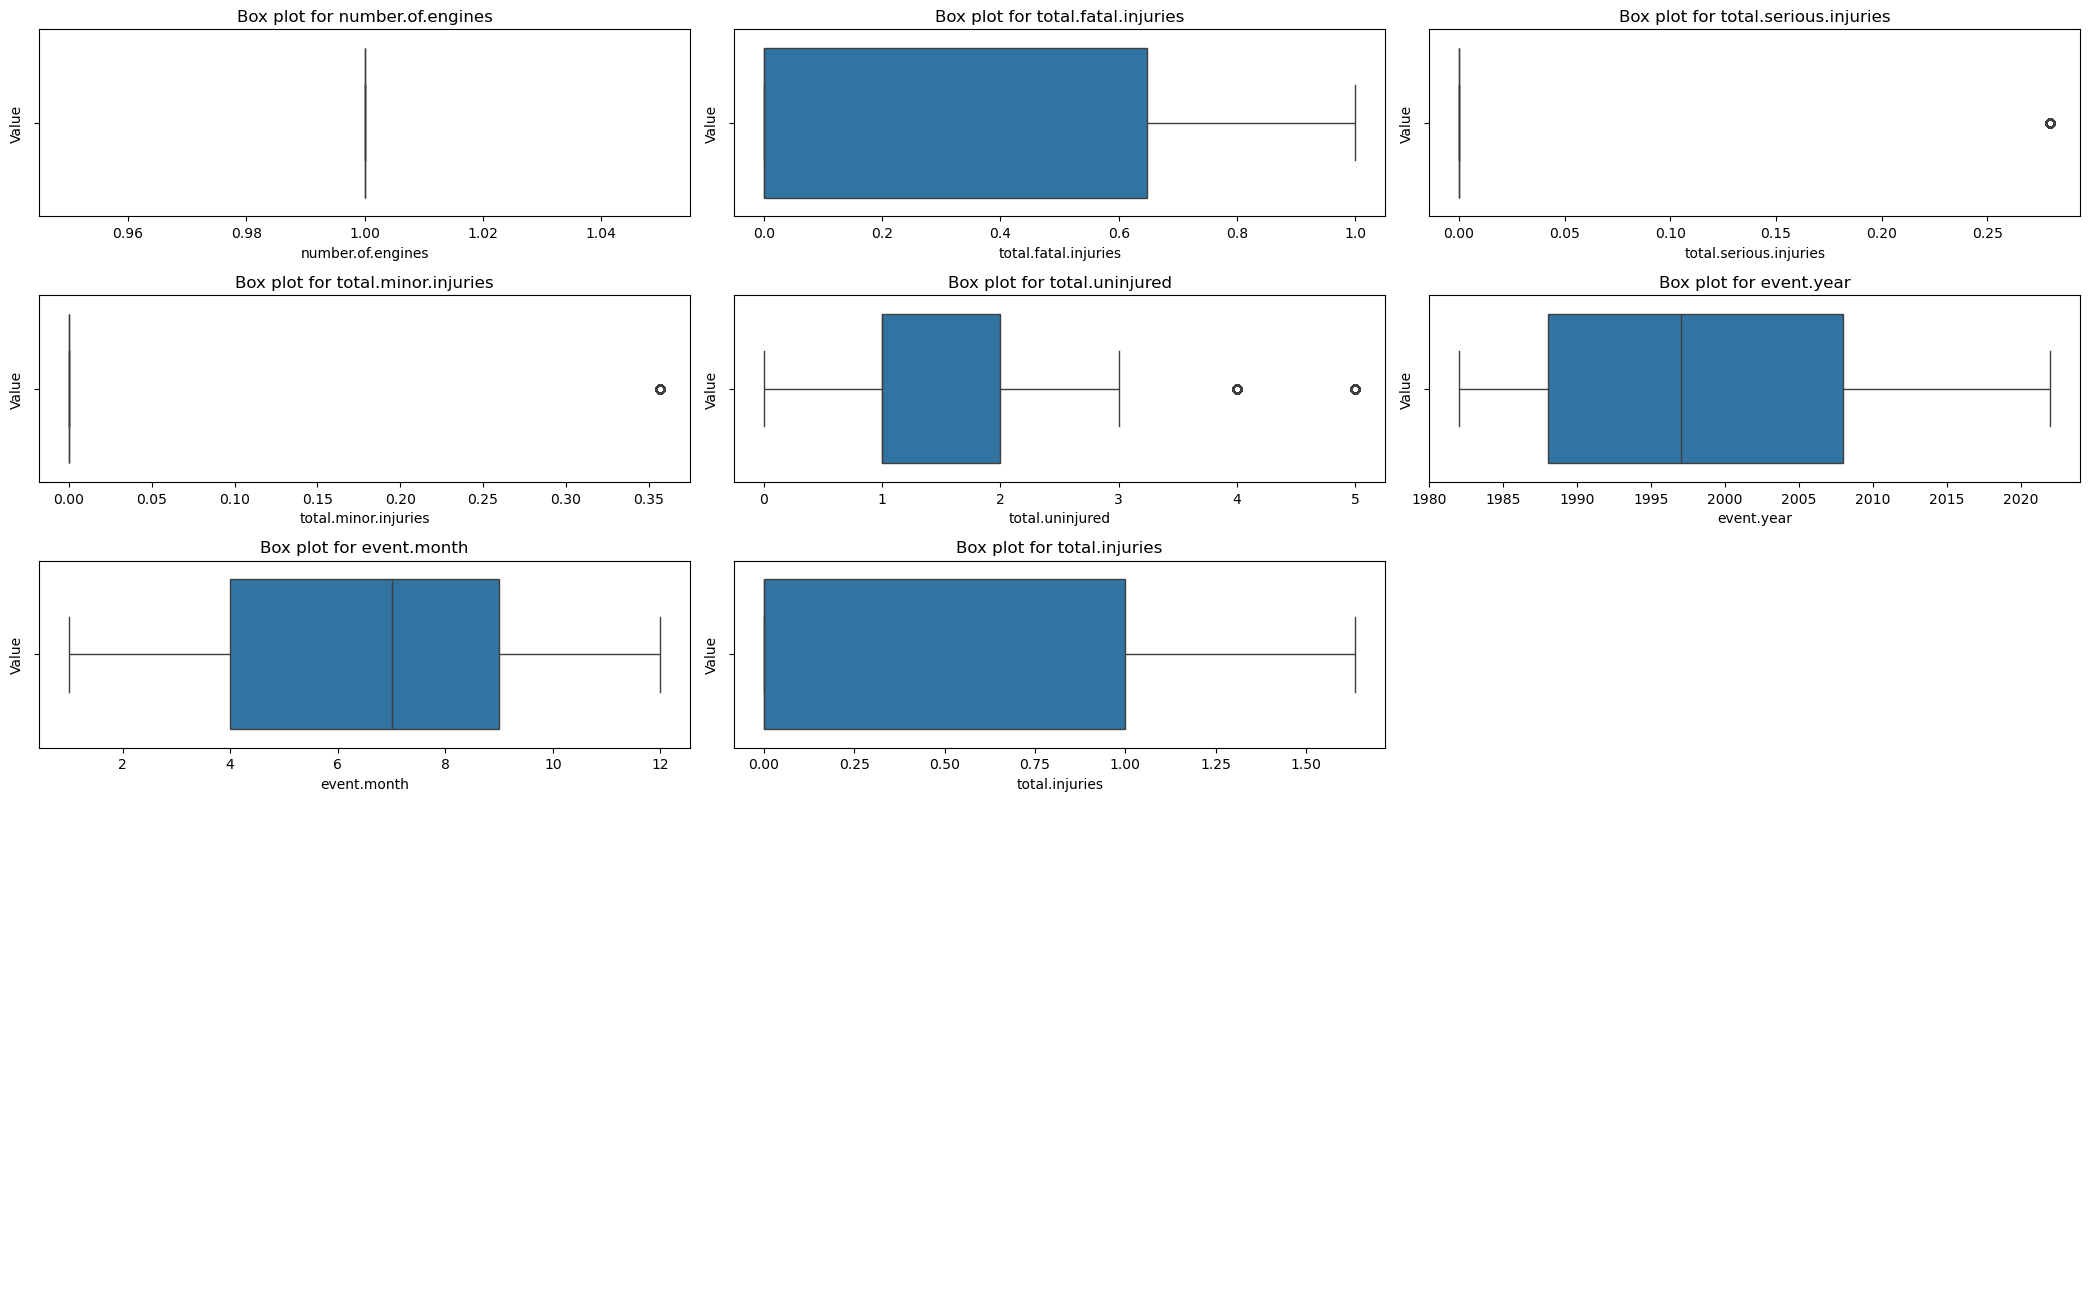

In [50]:
rows, cols = 5, 3
fig, axes = plt.subplots(rows, cols, figsize=(21, 13))


# Flatten 
axes = axes.flatten()

for i, column in enumerate(numeric_df):
    sns.boxplot(x=df[column], ax = axes[i])
    axes[i].set_title(f"Box plot for {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
    
# Hide empty subplots 
for j in range(i + 1, rows * cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [51]:
df.to_csv('cleaned_dataset.csv', index=False)

## Visualizations

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Bar Plot: Risk Category Distribution
    Visualize the number of events in each risk category.

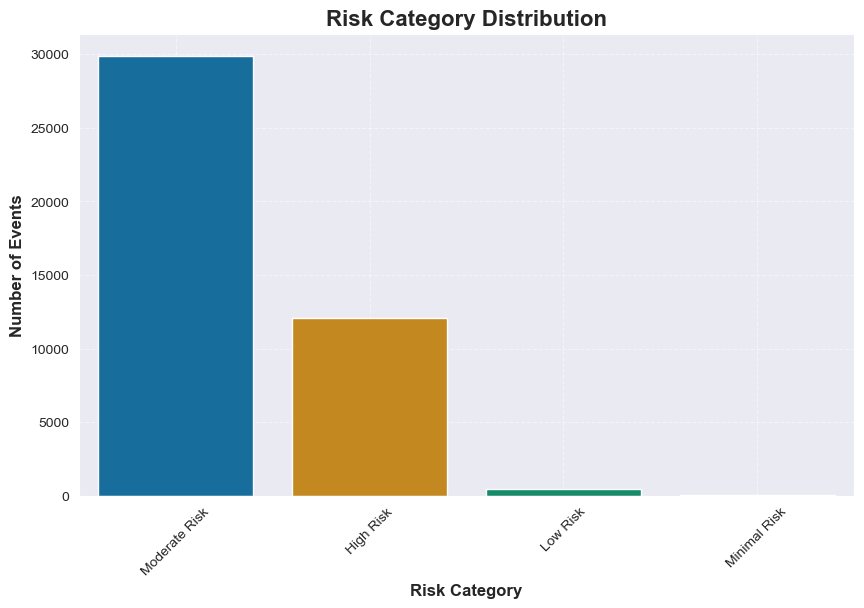

In [53]:
# Create a bar plot for the risk category distribution
sns.set_style('darkgrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='risk.category', data=df, palette='colorblind')

# setting the title
plt.title('Risk Category Distribution', fontsize=16, fontweight='bold')

# Labelling the x and y axis
plt.xlabel('Risk Category', fontsize=12, fontweight='bold', ha='center')
plt.ylabel('Number of Events', fontsize=12, fontweight='bold', ha='center')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

The bar plot indicates that most incidents fall under the 'Moderate Risk' category. 

Business Implications:
- Focus on reducing 'Moderate Risk' incidents through enhanced maintenance programs and pilot training.
- Collaborate with manufacturers to improve aircraft reliability and safety features.
- Use the data to develop insurance packages tailored to moderate-risk operations.


### 2. Generate Word Cloud for Event Distribution by Purpose of Flight
Help stakeholders quickly grasp which flight purposes are most common, allowing for more informed decision-making when considering aircraft acquisitions, safety measures, or operational strategies.

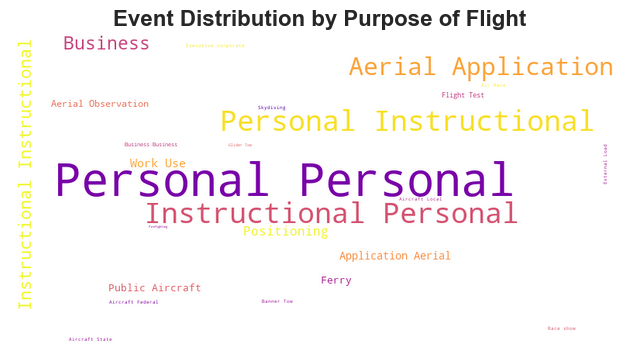

In [54]:
# Importing the required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Remove 'unknown' to exclude
data = df[df['purpose.of.flight'] != 'Unknown']

# Load the circular mask image 
mask = np.array(Image.open('wordcloud-matplotlib.png'))

# Concatenate data
text = ' '.join(data['purpose.of.flight'].dropna())

# Create the word cloud with a mask
wordcloud = WordCloud(width=800, height=400, contour_width=1, contour_color='black',
                      background_color='white', colormap='plasma').generate(text)

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')  # Hide the axes
plt.title('Event Distribution by Purpose of Flight', fontsize=16, fontweight='bold', ha='center')
plt.show()

The word cloud shows frequent incidents in personal, instructional, aerial application, public aircraft, work use, and business categories. Recommendations:

- Personal Flights: Promote safety training, tailored insurance, and maintenance packages for private owners.
- Instructional Flights: Enhance training protocols, use durable aircraft, and offer affordable insurance for training operations.
- Aerial Application: Invest in precision technologies (e.g., GPS), offer specialized maintenance, and advocate for stricter safety regulations.
- Public Aircraft: Modernize fleets, provide advanced training, and develop mission-specific aircraft with redundancy features.
- Business Flights: Market fuel-efficient aircraft, provide tailored insurance, and create maintenance plans for corporate aviation.

Targeted strategies can reduce risks and optimize services for these high-frequency categories.


### 3. Scatter Plot: Total Events vs. High-Risk Events
    Visualizing the volume of events and their associated risk.

In [55]:
# Remove 'unknown', 'unk' to exclude
df = df[df['aircraft.category'] != 'UNK']
df = df[df['aircraft.category'] != 'Unknown']
# Aggregating the data by aircraft category
df1 = df.groupby('aircraft.category').agg(
    total_events=('event.id', 'count'),
    high_risk_events=('risk.category', lambda x: (x == 'High Risk').sum()),
    avg_fatal_injuries=('total.fatal.injuries', 'mean')
).reset_index()

In [56]:
filtered_df = df1[(df1['aircraft.category'] != 'Airplane') &
                  (df1['aircraft.category'] != 'Helicopter') & (df1['aircraft.category'] != 'Glider')]

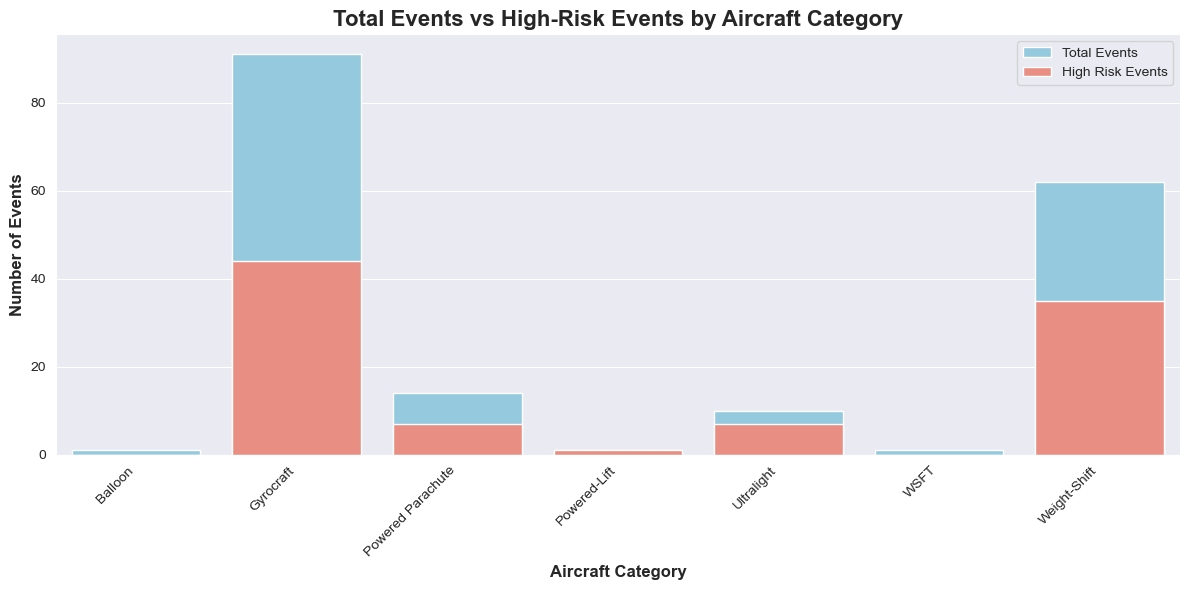

In [57]:
# Plot the bar plot
plt.figure(figsize=(12, 6))

# Plot total events vs high-risk events
sns.barplot(
    x='aircraft.category',  # Aircraft categories
    y='total_events',  # Total events per category
    data=filtered_df,  # Aggregated data
    color='skyblue',  # Color of the bars
    label='Total Events'
)

# Overlay high-risk events on top of total events
sns.barplot(
    x='aircraft.category',
    y='high_risk_events',
    data=filtered_df,
    color='salmon',  # Color for high-risk events
    label='High Risk Events'
)

# Add title and labels
plt.title('Total Events vs High-Risk Events by Aircraft Category', fontsize=16, fontweight='bold')
plt.xlabel('Aircraft Category', fontsize=12, fontweight='bold')
plt.ylabel('Number of Events', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

The scatter plot reveals that airplanes, helicopters, gliders, weight-shift, and balloons account for a high number of events, including high-risk ones.

Business Implications:
- Prioritize safety enhancements for these aircraft types.
- Tailor insurance and risk mitigation strategies based on the frequency and severity of incidents involving these categories.
- Partner with regulatory authorities to review safety regulations and standards for high-risk aircraft types.

### 4. Line Plot: Trends Over Time
    This line plot will show the trend of accidents/incidents over time, using the event_year column.
    Identifying low-risk opportunities in the aviation industry by using historical data trends to inform safer decisions.

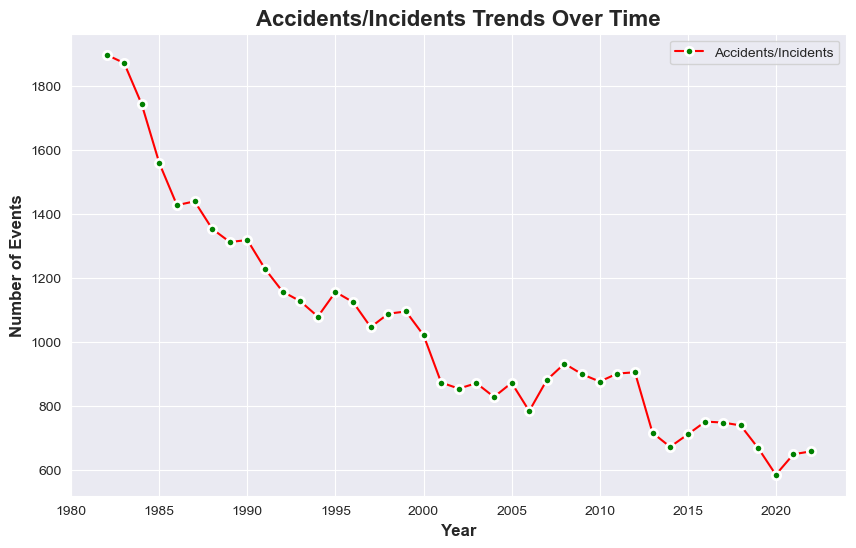

In [58]:
# Aggregate the data by year and count the events
event_counts = df.groupby('event.year')['event.id'].count().reset_index()

# Create a line plot showing the trend over time (accidents by year)
# Create a line plot using the aggregated data
plt.figure(figsize=(10, 6))
sns.lineplot(x='event.year', y='event.id',
             data=event_counts, marker='o', label='Accidents/Incidents', markerfacecolor='green',
             markeredgewidth=2, color='red')
plt.title('Accidents/Incidents Trends Over Time', fontsize=16, fontweight='bold', ha='center')
plt.xlabel('Year', fontsize=12, fontweight='bold', ha='center')
plt.ylabel('Number of Events', fontsize=12, fontweight='bold', ha='center')
plt.show()

The line plot indicates a significant rise in events starting from 1980, following a period of relatively stable or lower event counts from 1950 to 1980. Post-1980, the trend shows a reduction in events leading up to 2020.

Business Implications:
- The surge in events during the 1980s might indicate a shift in aircraft technology, regulation, or aviation practices that warrants further investigation.
- Post-1980s reduction could reflect improved safety protocols or advancements in aircraft technology.
- Understanding these trends can help businesses forecast future risks and tailor safety and training programs accordingly.


### 5. Scatter Plot: Injuries vs. Risk Category
    This scatter plot will show how injuries (total injuries, serious, fatal) relate to the risk category. 
    Provides actionable insights that directly address the business problem of identifying low-risk aircraft and ensuring   safety.

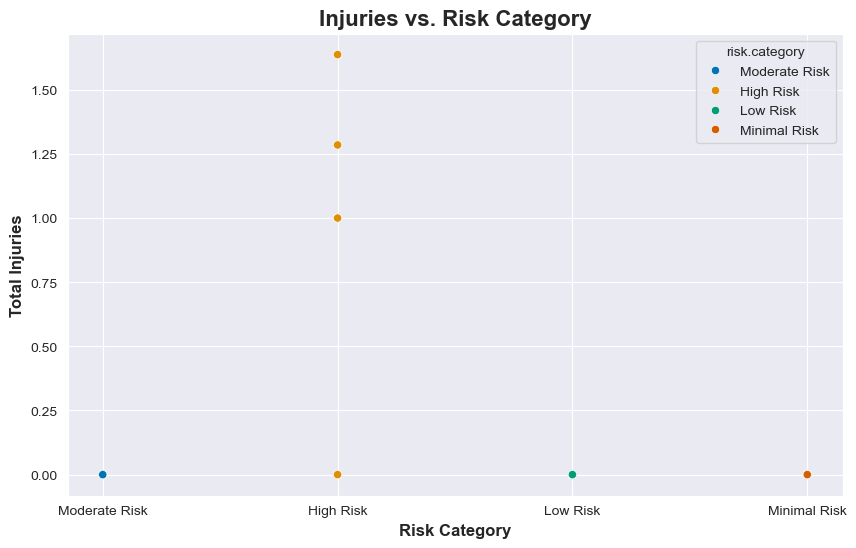

In [59]:
# Create a scatter plot showing injuries vs. risk category
plt.figure(figsize=(10, 6))
sns.scatterplot(x='risk.category', y='total.injuries', data=df, hue='risk.category', palette='colorblind')
plt.title('Injuries vs. Risk Category', fontsize=16, fontweight='bold', ha='center')
plt.xlabel('Risk Category', fontsize=12, fontweight='bold', ha='center')
plt.ylabel('Total Injuries', fontsize=12, fontweight='bold', ha='center')
plt.show()

The scatter plot shows a clear correlation where high-risk categories are associated with a higher number of total injuries.

Business Implications:
- High-risk categories, which include severe accidents, should be prioritized for safety improvements and targeted training programs.
- Identifying these high-risk categories can help businesses allocate resources to mitigate risks and reduce injuries.
- Investing in safety measures for high-risk categories could lead to a significant reduction in overall injury rates.


### 6. Word Cloud: Airport name with Risk category
    By associating Risk Categories with specific airport names, you can pinpoint airports with a disproportionately high number of High Risk or Moderate Risk incidents.
    Focus safety improvement initiatives, such as better equipment, enhanced training, or stricter regulations, at these high-risk airports.

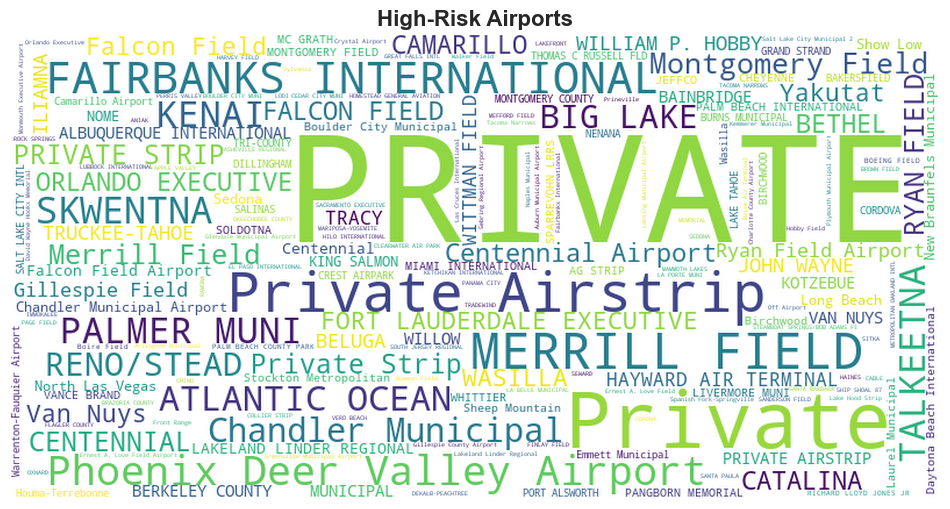

In [60]:
from wordcloud import WordCloud
# Remove rows where airport.name contains 'Unknown' or 'None'
df = df[~df['airport.name'].str.contains('Unknown|None', case=False, na=False)]

# Filter data for high-risk airports
high_risk_airports = df[df['risk.category'] == 'High Risk']['airport.name'].value_counts()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(high_risk_airports)

# Plot
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.title('High-Risk Airports', fontsize=16, fontweight='bold')
plt.show()

The word cloud reveals that airports such as 'Private', 'Fairbanks International', 'Orlando Executive', and 'Atlantic Ocean' appear most frequently in relation to risk categories.

Business Implications:
- Airports labeled as 'Private' or with specific high-frequency risk categories may require additional safety protocols.
- Private and smaller regional airports (e.g., Catalina, Santa Paula) could be more prone to incidents and should focus on targeted risk management strategies.
- Focusing on these airports with the highest frequency of incidents could help in reducing accidents and improving operational safety.


### 7.  Stacked Bar Chart: Frequency of Aircraft Damage by Airport and Make

In [61]:
# Remove rows where airport.name contains 'Unknown' or 'None'
df = df[~df['airport.name'].str.contains('Unknown|None', case=False, na=False)]

# Filter out private airports
non_private_airports_df = df[~df['airport.name'].str.contains('private', case=False, na=False)]

# Top 20 airports and aircraft makes excluding private airports
top_20_airports_non_private = non_private_airports_df['airport.name'].value_counts().head(20).index
top_20_makes_non_private = non_private_airports_df['make'].value_counts().head(20).index

# Filter for top 20 airports and makes excluding private airports
filtered_non_private_df = non_private_airports_df[
    non_private_airports_df['airport.name'].isin(top_20_airports_non_private) &
    non_private_airports_df['make'].isin(top_20_makes_non_private)
]

# Group data for bar plot
bar_data = filtered_non_private_df.groupby(['airport.name', 'make']).size().reset_index(name='count')

# Sort by count for better visualization
bar_data_sorted = bar_data.sort_values(by='count', ascending=False)

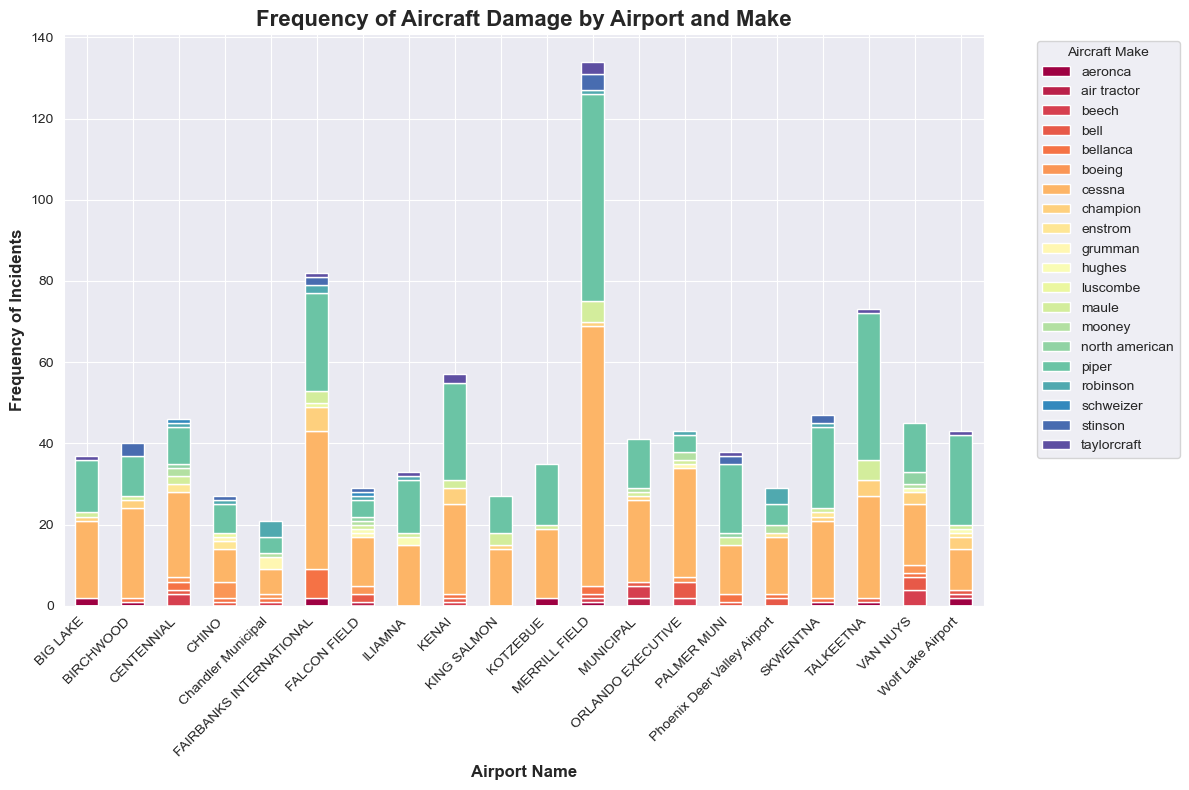

In [62]:
# Pivot data for stacked bar chart
stacked_data = bar_data_sorted.pivot(index='airport.name', columns='make', values='count').fillna(0)

# Plotting
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='Spectral'
)
plt.title('Frequency of Aircraft Damage by Airport and Make', fontsize=16, fontweight='bold')
plt.xlabel('Airport Name', fontsize=12, fontweight='bold')
plt.ylabel('Frequency of Incidents', fontsize=12, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Aircraft Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Stacked Bar Chart: 
Frequency of Aircraft Damage by Airport and Make
Key airports such as Merrill Field, Talkeetna, Fairbanks International, 
Wolf Lake Airport, and Kenai show a high frequency of incidents.
This suggests these airports may have higher traffic, challenging weather conditions, 
or other risk factors contributing to more frequent aircraft damage.
It highlights the need for improved safety protocols, monitoring, and risk mitigation strategies 
in these areas, as well as potentially revising insurance and operational measures for airlines operating in these airports.


### 8. Bar Plot:  Aircraft Make With Weather condition

In [63]:
# Remove rows where make contains 'Unknown' or 'None'
df = df[~df['make'].str.contains('Unknown|None', case=False, na=False)]

# Top 20 weather condition and makes 
top_20 = df['weather.condition'].value_counts().head(20).index
top_20_makes = df['make'].value_counts().head(20).index

# Filter for top 20
filtered_df = df[
    df['weather.condition'].isin(top_20) &
    df['make'].isin(top_20_makes)
]

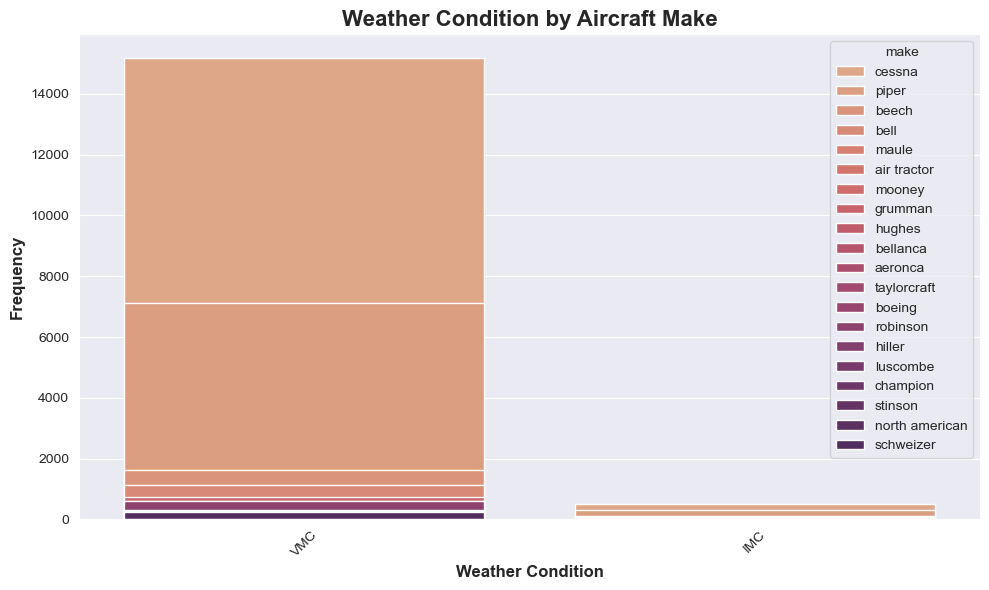

In [64]:
# Remove rows where Weather condition contains 'Unknown' or 'None'
df = df[~df['weather.condition'].str.contains('Unknown|None', case=False, na=False)]

# plotting the 'risk.category' and 'phase.of.flight' columns
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='weather.condition', hue='make', dodge=False, palette='flare')
plt.title('Weather Condition by Aircraft Make', fontsize=16, fontweight='bold')
plt.xlabel('Weather Condition', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Observations:**
  - **Cessna** has the highest frequency in **Visual Meteorological Conditions (VMC)**.
  - **Piper** follows as the second most frequent make in VMC.
  - There might be duplicated or inconsistently formatted entries for **Cessna**, such as **CESSNA**, indicating potential data cleaning issues.

- **Suggestions for Improvement:**
  - **Normalize the Data:** Combine entries with inconsistent formatting (e.g., "Cessna" and "CESSNA") for accurate insights.
  - **Enhanced Visualization:** Use grouped or stacked bar charts to compare performance across other weather conditions like **IMC** or adverse weather.

### 9. Heat Map: Risk Category By Phase of Flight
    Breaking down risk categories by each phase of flight separately,

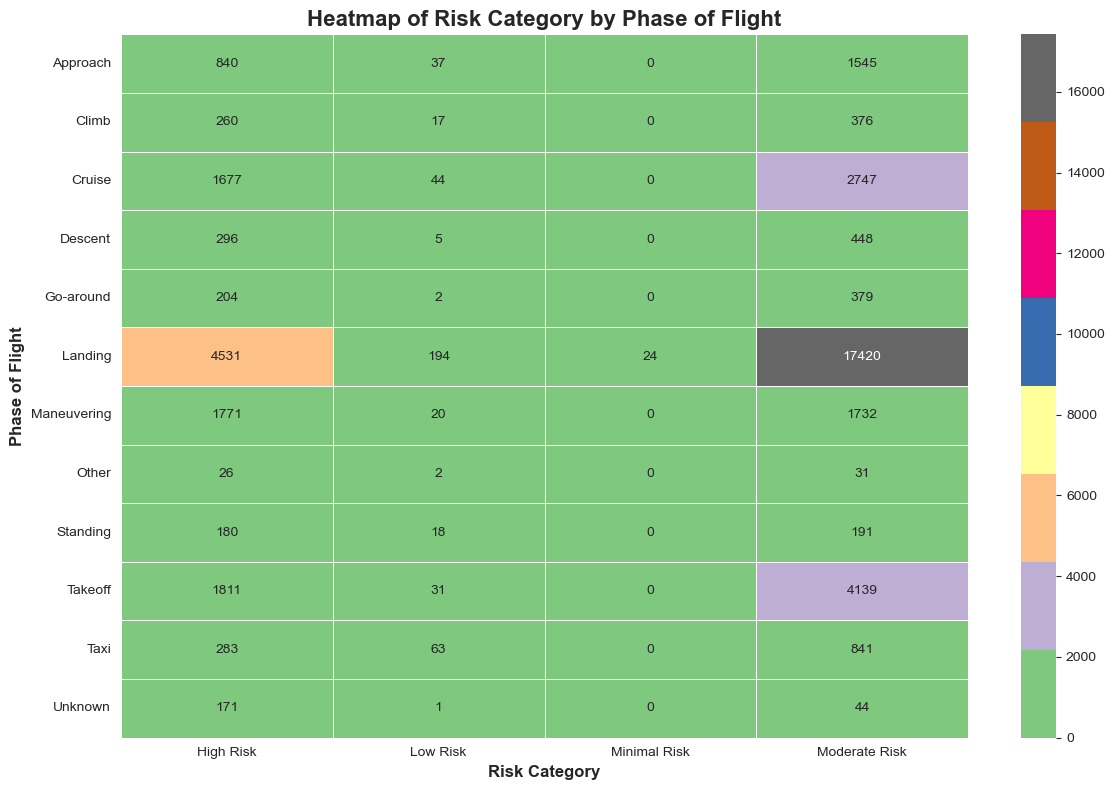

In [65]:
# Aggregate data for visualization
phase_risk_data = df.groupby(['broad.phase.of.flight', 'risk.category']).size().reset_index(name='count')

# Create a pivot table for heatmap
heatmap_data = phase_risk_data.pivot(index='broad.phase.of.flight', columns='risk.category', values='count').fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Accent', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Risk Category by Phase of Flight', fontsize=16, fontweight='bold')
plt.xlabel('Risk Category', fontsize=12, fontweight='bold')
plt.ylabel('Phase of Flight', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

The plot illustrates the distribution of risk categories across different phases of flight.
The key observations are:
1. Moderate Risk incidents are highest during the Landing phase.
2. High Risk and Low Risk incidents appear more frequently in take-off and landing phases compared to other flight phases.
3. Other flight phases like Cruise and Taxi show fewer high-risk incidents, indicating that these phases are generally safer.

Business Insights:
 - Focus on improving safety protocols, pilot training, and technology for critical flight phases like Landing and Take-off.
 - Investments in advanced monitoring systems and weather management could help mitigate High Risk during these phases.
 - Minor Low Risk incidents suggest a need to address smaller issues to prevent escalation.

These insights can guide businesses in refining their safety strategies, prioritizing high-risk flight phases, and enhancing overall flight safety.

far.description (Federal Aviation Regulations description)

Usefulness: Somewhat useful for regulatory compliance analysis. It can indicate the operational rules under which an aircraft was operating (e.g., private, commercial).
Business Insight: Helps ensure compliance with the safest regulatory environments.
far.description: To assess risks associated with different  operational regulations.

### 10. Bar Plot: FAR.Description (Federal Aviation Regulations description)

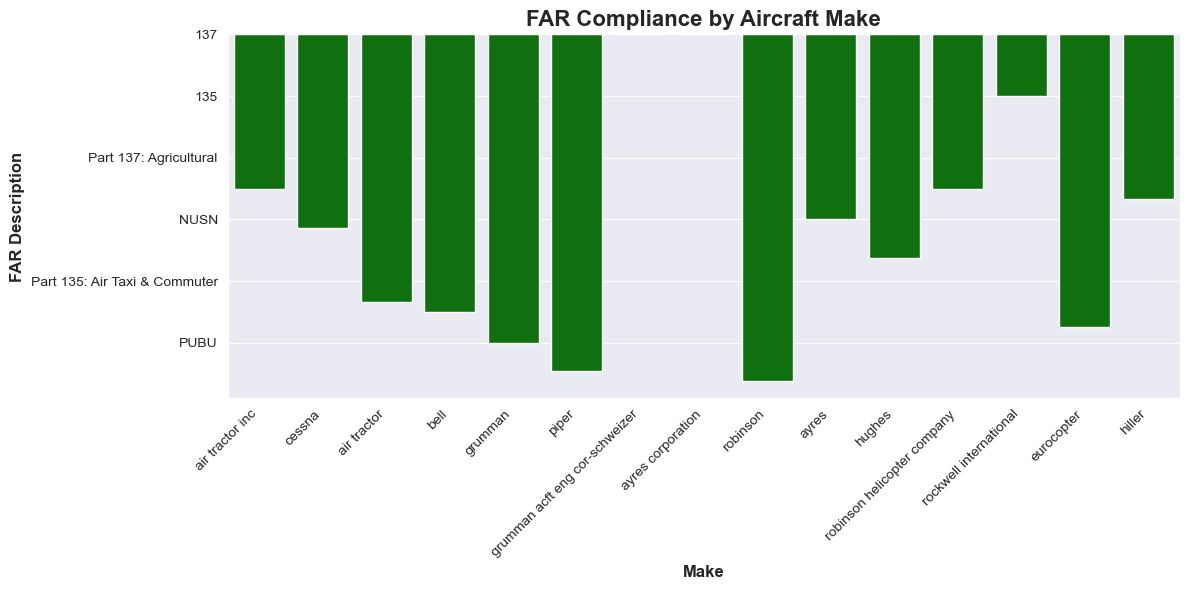

In [66]:
# Bar plot for FAR compliance vs Aircraft Make
# Remove rows where far.description contains 'Unknown' or 'None'
df = df[~df['far.description'].str.contains('Unknown|None|UNK', case=False, na=False)]
df = df[df['far.description'] != '091']
df = df[df['far.description'] != 'Part 91: General Aviation']

top_20_far_description = df['far.description'].value_counts().head(15).index
top_20_makes = df['make'].value_counts().head(15).index

# Filter for top 20 airports and makes excluding private airports
filtered_df = df[
    df['far.description'].isin(top_20_far_description) &
    df['make'].isin(top_20_makes)
]

# Aggregate the data for proper visualization
aggregated_data = filtered_df.groupby(['far.description', 'make']).size().reset_index(name='count')

# Sort makes by count to control the order
aggregated_data = aggregated_data.sort_values('count', ascending=False)

# Plot with controlled order
plt.figure(figsize=(12, 6))
sns.barplot(
    x='make', 
    y='far.description', 
    data=aggregated_data, 
    hue_order=aggregated_data['far.description'].unique(),
    color='green',
    ci=None
)
plt.xlabel('Make', fontsize=12, fontweight='bold')
plt.ylabel('FAR Description', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.title('FAR Compliance by Aircraft Make', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Observations:
  - Certain FAR descriptions are strongly associated with specific aircraft makes.
  - Some aircraft makes, such as Robinson and Air Tractor, dominate particular FAR categories, highlighting compliance patterns.

### Bar Plot: Aircraft Make By Count

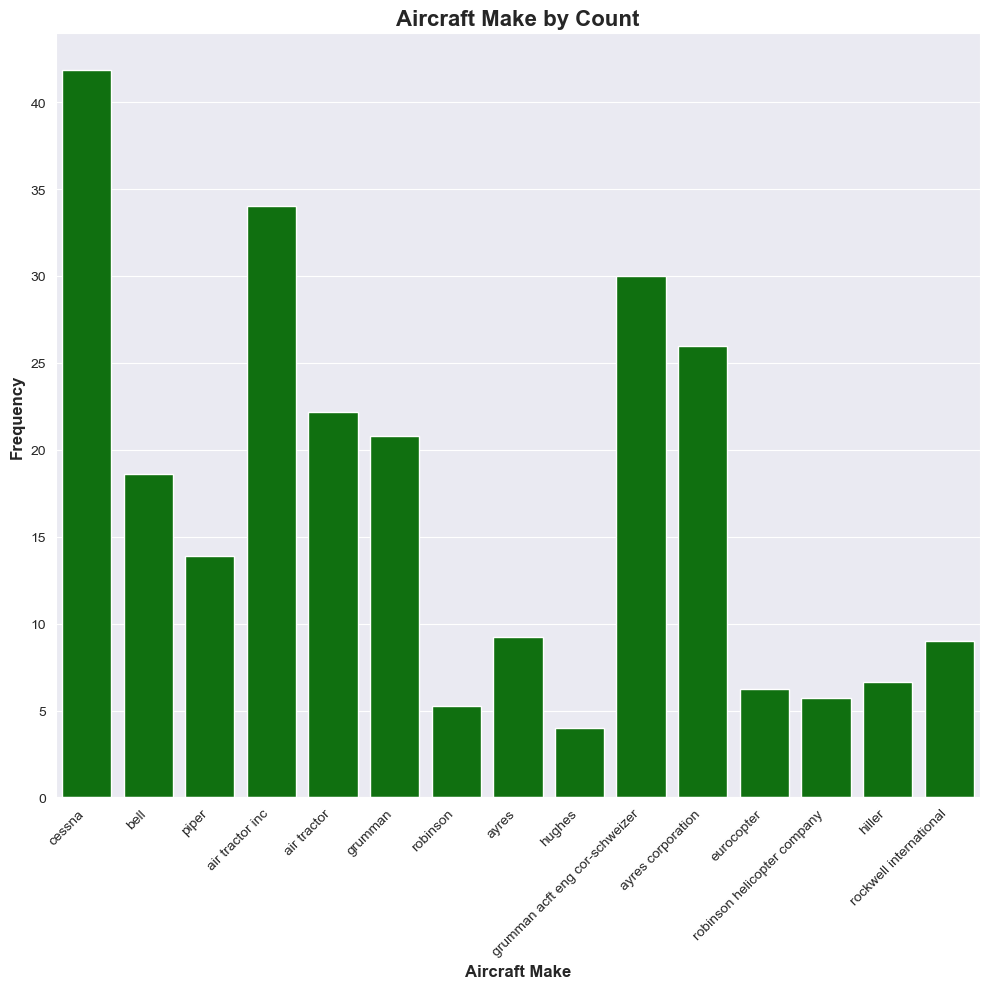

In [67]:
# Sort makes by total count (descending order)
sorted_makes = aggregated_data.groupby('make')['count'].sum().sort_values(ascending=False).index

# Plot with controlled order for 'make'
plt.figure(figsize=(10, 10))
sns.barplot(
    x='make',  
    y='count', 
    data=aggregated_data, 
    order=sorted_makes,  
    color='green',
    ci=None
)
plt.xlabel('Aircraft Make', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('Aircraft Make by Count', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Observations:
  - Aircraft makes such as Air Tractor INC, Grumman ACFT ENG Cor-Schweizer, Air Tractor, Cessna, and Grumman have the highest frequency of incidents.
  - These makes account for a significant portion of the dataset, indicating their widespread usage or higher risk exposure.

Relevance to the Business Problem:
  - Identifying aircraft makes with the highest incident counts helps prioritize safety assessments and maintenance checks.
  - Businesses can use this information to improve training programs for operators handling these aircraft types.
  - Regulatory agencies can investigate if the high counts are due to design issues, operational risks, or reporting biases.


### Bar Plot: FAR.Description (Federal Aviation Regulations description) By Count

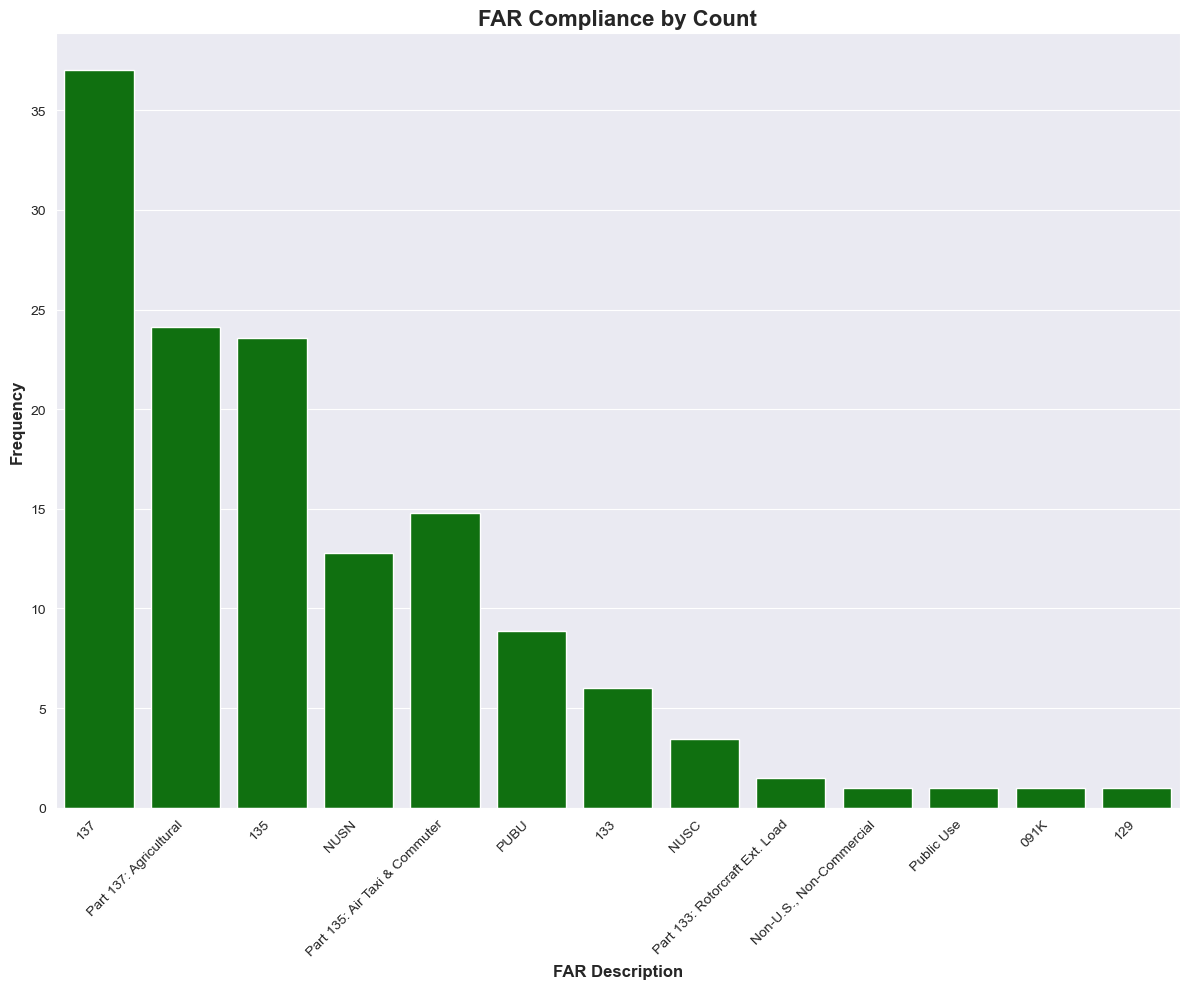

In [68]:
# Sort FAR descriptions by total count (descending order)
sorted_far_descriptions = aggregated_data.groupby('far.description')['count'].sum().sort_values(ascending=False).index

# Plot with controlled order for 'far.description'
plt.figure(figsize=(12, 10))
sns.barplot(
    x='far.description',  # FAR Description on x-axis for vertical bars
    y='count',
    data=aggregated_data,
    order=sorted_far_descriptions,  # Set the x-axis order explicitly
    color='green',
    ci=None
)
plt.xlabel('FAR Description', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.title('FAR Compliance by Count', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

Observations:
      - Part 135: Air Taxi & Commuter, 135, and NUSN categories have the highest frequency of incidents.
  - These FAR descriptions indicate types of operations related to agricultural flying and air taxi or commuter services, which seem to be more incident-prone.

Relevance to the Business Problem:
  - Understanding which FAR categories are associated with higher incident counts can help prioritize safety regulations for those specific sectors.
  - The data suggests that businesses involved in agricultural flying and air taxi services might need to focus on improving safety protocols, training, and maintenance practices.
  - Aviation companies can target risk mitigation strategies tailored to these operations to reduce accidents and improve operational safety.

### 11. Heat Map: Accidents by weather condition and risk category

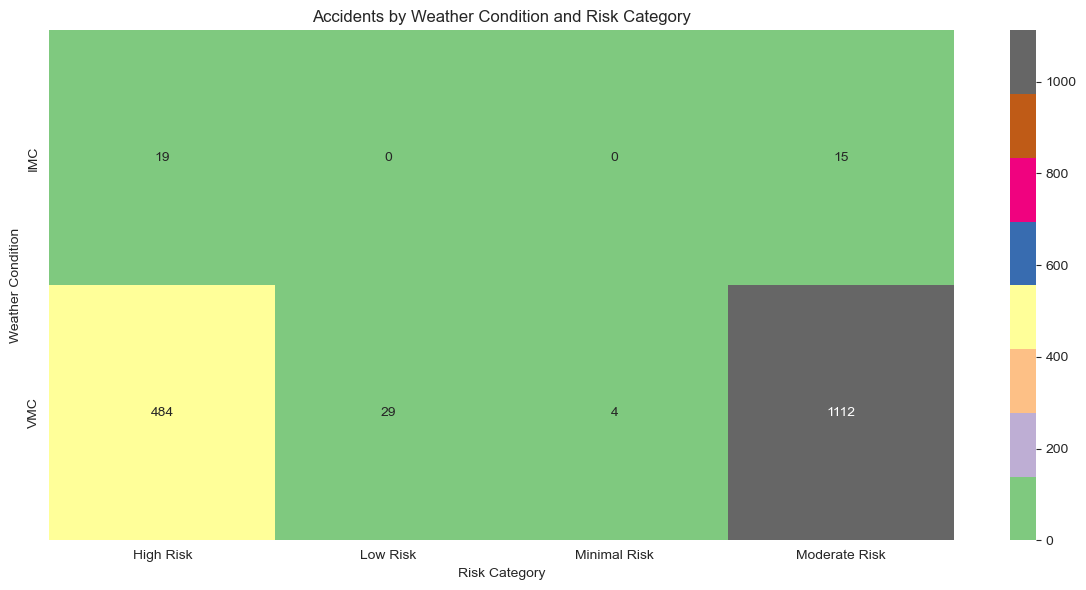

In [69]:
heatmap_data = df.groupby(['weather.condition', 'risk.category']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Accent', cbar=True)
plt.title('Accidents by Weather Condition and Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

Observations:
  - VMC (Visual Meteorological Conditions):
    - Moderate Risk: 1112 incidents
    - High Risk: 484 incidents
    - Minimal Risk: 4 incidents
    - Low Risk: 29 incidents
  - IMC (Instrument Meteorological Conditions):
    - High Risk: 19 incidents
    - Moderate Risk: 15 incidents
    - Low Risk: 0 incidents
    - Minimal Risk: 0 incidents

Relevance to the Business Problem:
  - The heatmap reveals that a significantly higher number of incidents occur in VMC conditions, with moderate and high-risk categories being the most prevalent.
  - IMC conditions, where visibility is low, show much fewer incidents, but the few that occur are still associated with moderate to high-risk categories.
  - This insight can guide businesses in prioritizing safety measures, especially under VMC conditions, which seem to be more prone to risk. 
  - Operational focus on high-risk scenarios in VMC could help improve safety outcomes, while monitoring and training for operations under IMC conditions remains important, though incidents are less frequent.

### Pie Chart: Incidents by weather condition

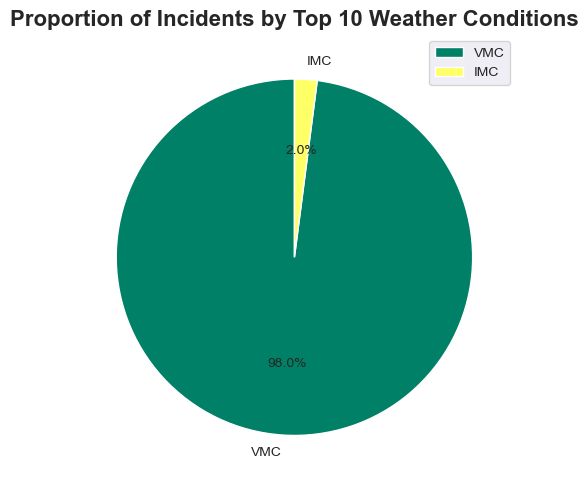

In [70]:
top_weather = df['weather.condition'].value_counts().head(10)
top_weather.plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', startangle=90,
                 colormap='summer', legend=True)
plt.title('Proportion of Incidents by Top 10 Weather Conditions', fontsize=16, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

 **Observations:**
  - VMC (Visual Meteorological Conditions): 98% of the incidents occurred under VMC.
  - IMC (Instrument Meteorological Conditions): Only 2% of the incidents occurred under IMC.

- Relevance to the Business Problem:
  - The overwhelming majority of incidents occur under VMC, which suggests that businesses and operators should focus on improving safety protocols, training, and operational procedures for conditions with good visibility.
  - While IMC incidents are rare, it’s still important to ensure that pilots and operators are well-trained for these conditions, considering that the fewer incidents that do occur under IMC tend to have a higher potential for severity.

### 12. Pie Chart: Accidents by Flight Schedule (Day, Night, Scheduled or Unscheduled) and Risk Category

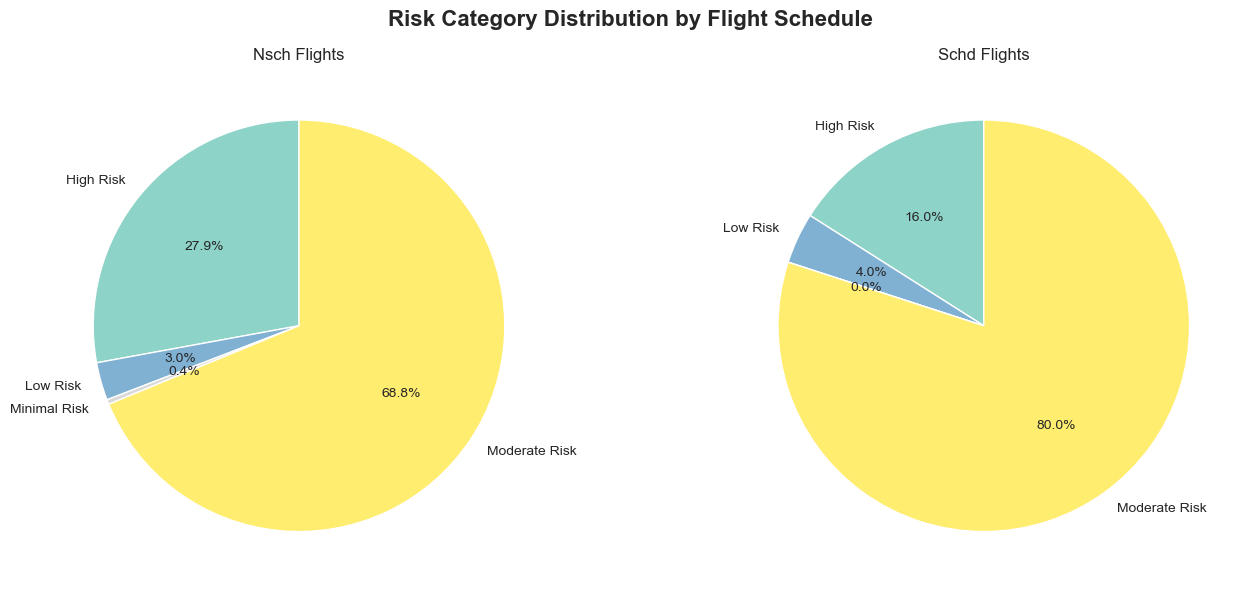

In [71]:
# Removing Unknown, UNK, and None values
df = df[~df['schedule'].str.contains('Unknown|None|UNK', case=False, na=False)]

schedule_data = df.groupby(['schedule', 'risk.category']).size().unstack().fillna(0)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot pie charts for scheduled and unscheduled
for i, schedule in enumerate(schedule_data.index):
    schedule_data.loc[schedule].plot.pie(
        ax=axes[i], autopct='%1.1f%%', startangle=90, cmap='Set3'
    )
    axes[i].set_title(f'{schedule.capitalize()} Flights')
    axes[i].set_ylabel('')  # Remove y-label for clarity

plt.suptitle('Risk Category Distribution by Flight Schedule', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 13. Bar Chart: Incident by Country

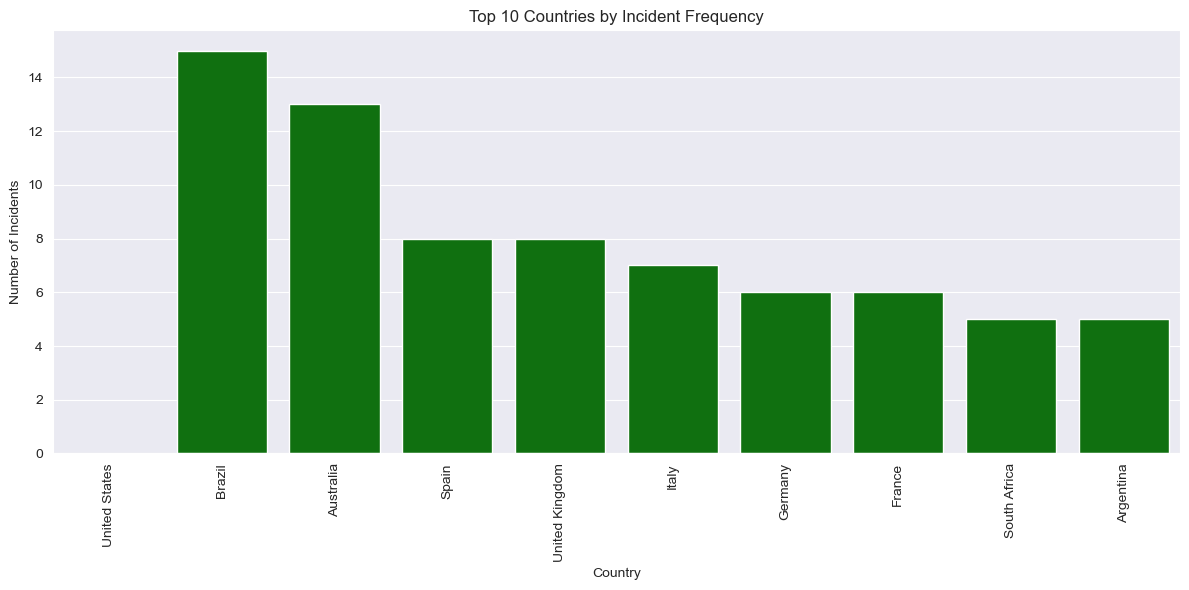

In [72]:
# Filter data for high-risk airports
df_US = df[df['country'] != 'United States']

# Bar plot for incidents by country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df_US, color='green', order=df['country'].value_counts().index[:10])
plt.title('Top 10 Countries by Incident Frequency')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 14. Heat map And Bar Plot: Engine Type by Risk Category

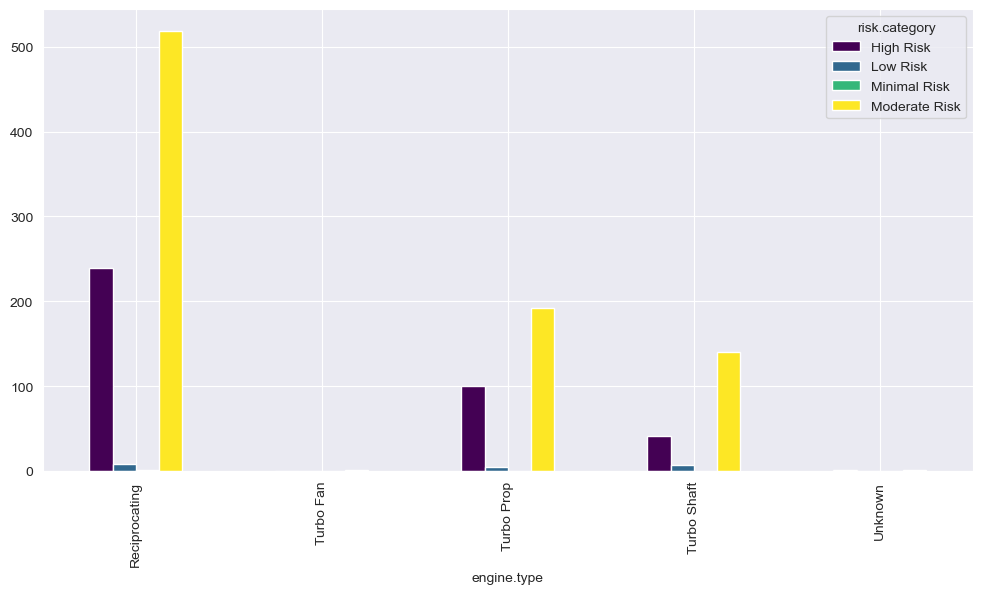

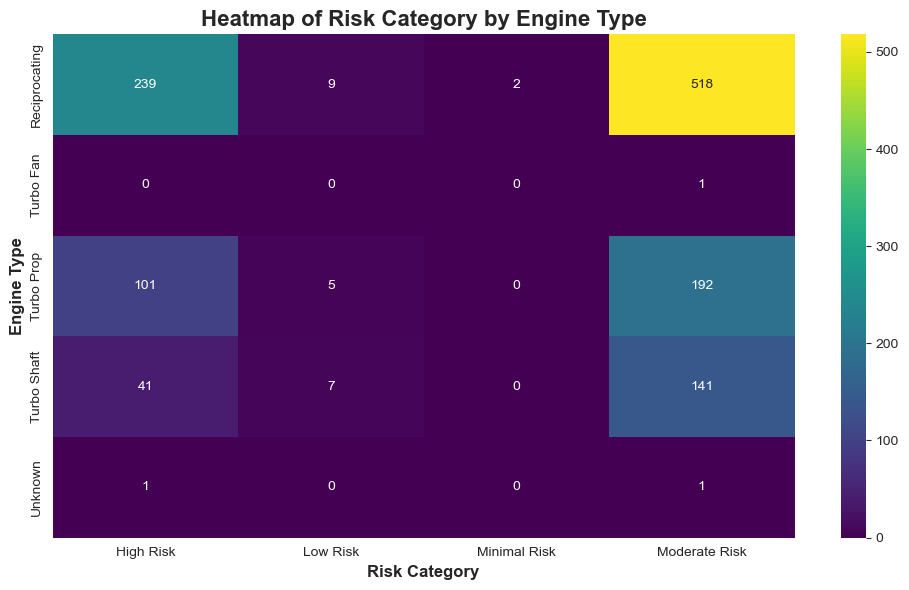

In [73]:
# Aggregate data for plotting
df = df[~df['engine.type'].str.contains('Unknown|None', case=False, na=False)]
engine_risk_data = filtered_df.groupby(['engine.type', 'risk.category']).size().unstack().fillna(0)

# Plot grouped bar chart
engine_risk_data.plot(kind='bar', figsize=(12, 6), colormap='viridis')

plt.figure(figsize=(10, 6))
sns.heatmap(engine_risk_data, annot=True, fmt='.0f', cmap='viridis', cbar=True)

plt.title('Heatmap of Risk Category by Engine Type', fontsize=16, fontweight='bold')
plt.xlabel('Risk Category', fontsize=12, fontweight='bold')
plt.ylabel('Engine Type', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### Summary:

1. The analysis focused on understanding various aspects of aviation incidents, including risk categories, aircraft make, weather conditions, and flight schedules. Key insights from the data include:

2. Risk Category Distribution: A significant portion of incidents occurred under moderate and high-risk categories. Moderate risk was most prevalent during landing and other phases of flight.

3. Aircraft Make: The most frequent aircraft involved in incidents include Cessna, Piper, and Air Tractor models. This suggests that these aircraft types are more commonly involved in incidents.

4. Weather Conditions: The majority of accidents occurred under Visual Meteorological Conditions (VMC), with minimal incidents under Instrument Meteorological Conditions (IMC).

5. Flight Schedule: There was a notable difference in incidents between scheduled and unscheduled flights, with unscheduled flights typically having more frequent incidents.

6. Phase of Flight: Incidents were most common during landing, followed by takeoff, indicating higher risk during these critical flight phases.

7. Federal Aviation Regulations (FAR) Compliance: The data shows that Part 137: Agricultural and Part 135: Air Taxi & Commuter operations had the highest frequency of incidents, which could point to operational challenges in these sectors.

### Future Insights:

1. Aircraft Make & Incident Risk: Given that certain aircraft models like Cessna, Piper, and Air Tractor are more frequently involved in incidents, there could be a need for specialized training, enhanced safety measures, or a deeper look into the design and maintenance of these aircraft models.

2. Weather Conditions: The predominance of incidents under VMC suggests that pilots may not be adequately prepared for adverse weather. Businesses entering the aviation industry should consider offering weather training programs for pilots, including simulation of challenging weather conditions.

3. Risk in Flight Phases: High-risk incidents during takeoff and landing phases indicate that these critical stages require focused safety measures, such as better pilot training, automated systems, and incident prevention strategies during takeoff and landing operations.

4. Regulatory Considerations: Understanding the types of FAR regulations that govern specific aviation operations is crucial for new businesses. Part 137 (Agricultural) and Part 135 (Air Taxi & Commuter) have higher incident rates, suggesting that businesses should ensure they adhere strictly to regulations and implement safety practices specific to these sectors.

### Recommendations for the Business:

1. Safety Focus During Takeoff and Landing: Given that these phases of flight show the highest risk, businesses should invest in technologies and procedures that enhance safety during these critical flight phases. This could include better pilot training, advanced navigation systems, or automatic landing assistance.

2. Pilot Training Programs: Businesses entering aviation should develop comprehensive pilot training programs focused on handling adverse weather, particularly in VMC conditions. Training should also emphasize incident management and risk mitigation during high-risk phases of flight.

3. Maintenance and Aircraft Type Monitoring: Frequent incidents with certain aircraft makes (e.g., Cessna, Piper, Air Tractor) suggest that routine maintenance schedules and monitoring should be prioritized, especially for aircraft used in high-risk sectors like agricultural aviation or air taxi services.

4. Weather-Related Preparations: The high frequency of incidents during VMC highlights the need for weather-related preparedness. A weather monitoring system, real-time data integration, and contingency planning for weather disruptions would enhance safety and reduce incidents.

5. Regulatory Compliance & Monitoring: New aviation businesses should ensure full compliance with FARs, especially Part 137 (Agricultural) and Part 135 (Air Taxi & Commuter). They should also establish internal monitoring systems to track FAR compliance and safety records, as these could impact the frequency of incidents.

6. Consider Unscheduled Flights: The higher frequency of incidents in unscheduled flights suggests the need for stricter regulations or safety protocols for unscheduled flight operations. Businesses should consider differentiating their safety measures between scheduled and unscheduled operations, with the latter potentially requiring more rigorous safety oversight.